# Linear Fitting by Python
Least square linear fitting when data has errors in both x and y directions.  
data:  
$$(x_i,y_i)\ \ \ (i=1,2,\cdot\cdot\cdot,N)$$
fitting function:  
$$y=ax+b$$
evaluation value:  
$$S(a,b)=\sum_i\frac{(y_i-ax_i-b)^2}{1+a^2}$$

In [1]:
from sympy import *
init_printing()

calculate $\frac{\partial S}{\partial a},\frac{\partial S}{\partial b}$ by SymPy

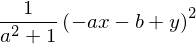

In [32]:
x=Symbol('x')
y=Symbol('y')
a=Symbol('a')
b=Symbol('b')
term=(y-a*x-b)**2/(1+a**2)
term

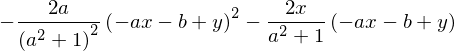

In [33]:
term_a=diff(term,a)
term_a

In [35]:
term_a_n=term_a*(a**2+1)**2
term_a_n=term_a_n.simplify()
term_a_n

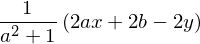

In [34]:
term_b=diff(term,b)
term_b

In [36]:
term_b_n=term_b*(a**2+1)
term_b_n=term_b_n.simplify()
term_b_n

In [41]:
(term_a_n/2).expand()

From the calculation above,the necessary conditions for minimal $S(a,b)$ is:
\begin{align*}
&\frac{\partial S}{\partial a}=\frac{\partial S}{\partial b}=0 \\
\Leftrightarrow &\sum_i (x_i+ay_i-ab)(ax_i-y_i+b)=\sum_i (ax_i-y_i+b)=0  \\
\Leftrightarrow &a\sum_i x_i^2 +(a^2-1)\sum_i x_iy_i-a\sum_iy_i^2+(1-a^2)b\sum_ix_i+\
2ab\sum_iy_i-ab^2N=0\ , \\
&a\sum_ix_i-\sum_iy_i+Nb=0
\end{align*}

In [42]:
def con1(a,b,xs,ys):
    #a,b:Symbol xs,ys:list
    xx=sum([x**2 for x in xs])
    xy=sum([x*y for x,y in zip(xs,ys)])
    yy=sum([y**2 for y in ys])
    x=sum(xs)
    y=sum(ys)
    N=len(xs)
    expr=a*xx+(a**2-1)*xy-a*yy+(b-a**2*b)*x+2*a*b*y-a*b**2*N
    return expr

In [43]:
xs=[1,2,3,4,5]
ys=[3,1,34,4,5]
con1(a,b,xs,ys)

In [44]:
def con2(a,b,xs,ys):
    x=sum(xs)
    y=sum(ys)
    N=len(xs)
    expr=a*x-y+N*b
    return expr

In [48]:
con2(a,b,xs,ys)

In [7]:
sigma_a=diff(sigma,a)

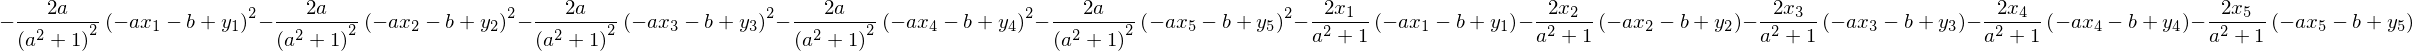

In [8]:
sigma_a

In [9]:
sigma_aa=sigma_a*(a**2+1)**2

In [10]:
sigma_aa=sigma_aa.simplify()

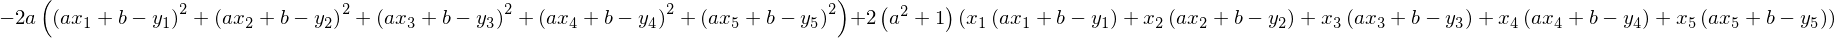

In [11]:
sigma_aa

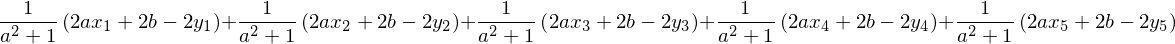

In [12]:
sigma_b=diff(sigma,b)
sigma_b

In [14]:
sigma_bb=sigma_b*(a**2+1)
sigma_bb=sigma_bb.simplify()
sigma_bb

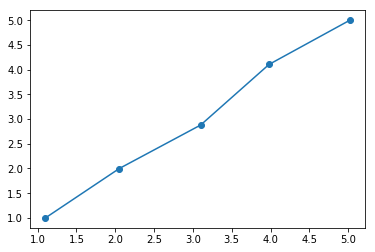

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
x=[1.1,2.05,3.1,3.98,5.02]
y=[1,1.998,2.88,4.105,4.999]
plt.plot(x,y,marker='o')


In [51]:
solve([con1(a,b,x,y),con2(a,b,x,y)],[a,b])

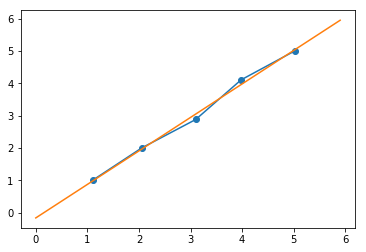

In [30]:
import numpy as np
x1=np.arange(0,6,0.1)
y1=1.03531049918079*x1-0.16129702250142
x=[1.1,2.05,3.1,3.98,5.02]
y=[1,1.998,2.88,4.105,4.999]
plt.plot(x,y,marker='o')
plt.plot(x1,y1)